# Sub-clustering and LRP weight plot

In [1]:
import copy
import numpy as np
import pandas as pd
import scanpy as sc
import os.path as osp
import matplotlib.pyplot as plt
from typing import List, Union, Literal

import STCase

# Define input parameters directly or through interactive widgets
class Args:
    def __init__(self, root: str, ds_dir: str, ds_name: str,
                 h5_name: str, label_col_name: str, n_nei: int, target_types: List[str]=[],
                 bad_types: List[str]=[], n_clusters: int=-1, alpha: float=0.0, reso: float=None,
                 init: Union[Literal["one"], Literal["std"], Literal["re_sum"], Literal["sum"]]='one', 
                 gpu: int=0, use_gpu: bool=False, wo_anno: bool=False, region_col_name: str='NULL'):
        self.root = root
        self.ds_dir = ds_dir
        self.ds_name = ds_name
        self.h5_name = h5_name
        self.label_col_name = label_col_name
        self.target_types = target_types
        self.bad_types = bad_types
        self.n_nei = n_nei
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.reso = reso
        self.init = init
        self.gpu = gpu
        self.use_gpu = use_gpu
        self.wo_anno = wo_anno
        self.region_col_name = region_col_name

# Usage:
test_args = Args(root='./tests/', ds_dir='datasets/', ds_name='NC_OSCC_s1', 
                 h5_name='s1_nohvg_stringent', target_types=['SCC'], 
                 gpu=1, use_gpu=True, n_nei=6, n_clusters=3, alpha=0.25,
                 label_col_name='cell_type', region_col_name='cluster_annotations')

## Prepare args for sub-clustering

In [2]:
stcase_args = STCase.prepare(test_args)

Input ST data: AnnData object with n_obs × n_vars = 1131 × 18100
    obs: 'pathologist_anno.x', 'sample_id.x', 'cluster_annotations', 'cell_type', 'n_genes_by_counts', 
'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 
'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 
'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 
'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Cell_neighbors', 'LR_cell_weight', 'LR_celltype_aggregate_weight', 'LR_celltype_edge_num', 
'LR_celltype_mean_weight', 'LR_celltype_weight', 'LR_close_gene', 'LR_close_gene_exp', 'LR_gene_complex_exp', 
'LR_gene_complex_information', 'LR_pair_information', 'LR_pathway_cell_weight', 'LR_pathway_celltype_count', 
'LR_pathway_celltype_edge_num', 'LR_pathway_celltype_mean_weight', 'LR_pathway_celltype_weight', 
'cell_type_colors', 'cell_type_list', 'cluster_annotations_colors', 'log1p', 'radius', 'scenic_res', 'spatial'
    obsm: 'distances', 'spatial'

/home/tid/mambaforge/envs/stcase/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:72: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.


318.1384907850702 5932 2.6224580017683468

<Figure size 640x480 with 0 Axes>

## Training GNN for sub-clustering

In [3]:
STCase.train(stcase_args)

>>> Model and Training Details

{
    'root': './tests/',
    'ds_dir': 'datasets/',
    'ds_name': 'NC_OSCC_s1',
    'h5_name': 's1_nohvg_stringent',
    'label_col_name': 'cell_type',
    'target_types': ['SCC'],
    'bad_types': [],
    'n_nei': 6,
    'n_clusters': 3,
    'alpha': 0.25,
    'reso': None,
    'init': 'one',
    'gpu': 1,
    'use_gpu': True,
    'wo_anno': False,
    'region_col_name': 'cluster_annotations',
    'time_stamp': '0524_0642',
    'raw_path': 'datasets/',
    'data_path': 'generated/',
    'model_path': 'model/',
    'result_path': 'result/',
    'embedding_data_path': 'embedding/',
    'data_name': 'NC_OSCC_s1',
    'device': 1,
    'seed': 0,
    'lr_cut': 'FULL',
    'h': 10,
    'n_input': 3000,
    'num_epoch': 100,
    'learning_rate': 0.001,
    'use_norm': False,
    'use_whole_gene': False
}

>>> For SCC spots

X: (1131, 3000)

Output()

>>> Cache exisits: generated/NC_OSCC_s1/pre_cluster_adj_5.pkl

Edges in Adj for SCC: 1422

Edges in Adj' for SCC: 626

Output()

#Interaction without edges=555

#Interaction without std=279

Output()

#Interaction without edges after replacing=0

Use 1513 LR pairs

>>> STCase sub-clustering...

Initial LR pairs' lambda Parameter containing:
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], requires_grad=True)


>>> Epoch: 100, Loss: 0.00046

time: 80.588, l_sp: 0.0005

Min Loss: 0.00046268512960523367

>>> Drawing map

/home/tid/projects/STACCI/STACCI/utils.py:175: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.


Resolution: 0.19999999999999998

3 clusters in drawing...

>>> Similarity Matrix:

Pred: 0 Pred: 1 Pred: 2

True: core      2.0     41.0    0.0

True: edge      86.0    1.0     25.0

True: nc        24.0    7.0     4.0

True: transitory        28.0    20.0    5.0

>>> Label Mapping:
{1: 'core', 0: 'edge', 2: 'transitory'}

>>> ARI: 0.2514609622056457

>>> NMI: 0.2950353059298418

>>> F1-score: 0.4692121042163613

>>> Accuracy: 0.5432098765432098

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


>>> Similarity Matrix:

Pred: 0 Pred: 1 Pred: 2

True: core      0.0     42.0    1.0

True: edge      25.0    2.0     85.0

True: nc        4.0     8.0     23.0

True: transitory        5.0     21.0    27.0

>>> Label Mapping:
{1: 'core', 2: 'edge', 0: 'transitory'}

>>> ARI: 0.25562096253427424

>>> NMI: 0.2954294274015007

>>> F1-score: 0.4691525868553842

>>> Accuracy: 0.5432098765432098

SCC_alpha=0.25_reso=None_cut=FULL_hvg=3000_nei=6

<Figure size 640x480 with 0 Axes>

## Plot results

In [4]:
t = stcase_args.target_types[0]
print(f">>> For {t.replace('/', 'or')} spots")

>>> For SCC spots


In [5]:
args = copy.deepcopy(stcase_args)
data_fold = osp.join(args.raw_path, args.data_name)
adata_h5ad = sc.read_h5ad(osp.join(data_fold, f'{args.h5_name}.h5ad'))
adata_h5ad

AnnData object with n_obs × n_vars = 1131 × 18100
    obs: 'pathologist_anno.x', 'sample_id.x', 'cluster_annotations', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Cell_neighbors', 'LR_cell_weight', 'LR_celltype_aggregate_weight', 'LR_celltype_edge_num', 'LR_celltype_mean_weight', 'LR_celltype_weight', 'LR_close_gene', 'LR_close_gene_exp', 'LR_gene_complex_exp', 'LR_gene_complex_information', 'LR_pair_information', 'LR_pathway_cell_weight', 'LR_pathway_celltype_count', 'LR_pathway_celltype_edge_num', 'LR_pathway_celltype_mean_weight', 'LR_pathway_cellt

In [6]:
cell_types = adata_h5ad.obs[args.label_col_name]
print('>>> Cell types:')
print(cell_types)
type_id_list = cell_types[cell_types == t].index.to_list()
print(f">>> {t.replace('/', 'or')} spots index list:")
print(type_id_list)

>>> Cell types:
AAACACCAATAACTGC-1    Lymphocyte Negative Stroma
AAACAGGGTCTATATT-1                           SCC
AAACCGTTCGTCCAGG-1    Lymphocyte Negative Stroma
AAACGAGACGGTTGAT-1                           SCC
AAACTGCTGGCTCCAA-1                        Muscle
                                 ...            
TTGTGGTAGGAGGGAT-1    Lymphocyte Negative Stroma
TTGTTAGCAAATTCGA-1    Lymphocyte Positive Stroma
TTGTTCAGTGTGCTAC-1    Lymphocyte Positive Stroma
TTGTTGTGTGTCAAGA-1    Lymphocyte Positive Stroma
TTGTTTCCATACAACT-1    Lymphocyte Negative Stroma
Name: cell_type, Length: 1131, dtype: category
Categories (4, object): ['Lymphocyte Negative Stroma', 'Lymphocyte Positive Stroma', 'Muscle', 'SCC']
>>> SCC spots index list:
['AAACAGGGTCTATATT-1', 'AAACGAGACGGTTGAT-1', 'AAATGGCCCGTGCCCT-1', 'AACCCTACTGTCAATA-1', 'AACGATATGTCAACTG-1', 'AACGGCCATCTCCGGT-1', 'AACTCTCAATAGAGCG-1', 'AACTGGGTCCCGACGT-1', 'AAGCTAGATCGAGTAA-1', 'AAGGATCGATCGCTTG-1', 'AAGGTATCCTAATATA-1', 'AAGTTCGGCCAACAGG-1', 'AATC

In [7]:
gene_tag = f"hvg={'FULL' if args.use_whole_gene else args.n_input}"
method = f"{t.replace('/', 'or')}_alpha={args.alpha}_reso={args.reso}_" + \
    f"cut={args.lr_cut}_{gene_tag}_nei={args.n_nei}"
outdir = osp.join('results/', args.data_name, args.time_stamp, method)
f = open(osp.join(outdir, f"mclust_fixed_n={args.n_clusters}_{t.replace('/', 'or')}_types.txt")) # Use mclust result
line = f.readline() # drop the first line  
cell_cluster_type_list = []
while line: 
    tmp = line.split('\t')
    cell_cluster_type = str(tmp[1].replace('\n', '')).strip()
    cell_cluster_type_list.append(f'{t}_{cell_cluster_type}')
    line = f.readline()
f.close()
print(f">>> Predicted {t.replace('/', 'or')} spots sub-cluster label list:")
print(cell_cluster_type_list)

>>> Predicted SCC spots sub-cluster label list:
['SCC_0', 'SCC_2', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_0', 'SCC_1', 'SCC_2', 'SCC_2', 'SCC_1', 'SCC_1', 'SCC_0', 'SCC_2', 'SCC_0', 'SCC_1', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_1', 'SCC_0', 'SCC_1', 'SCC_1', 'SCC_2', 'SCC_1', 'SCC_2', 'SCC_1', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_1', 'SCC_0', 'SCC_1', 'SCC_1', 'SCC_1', 'SCC_1', 'SCC_1', 'SCC_2', 'SCC_2', 'SCC_1', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_1', 'SCC_1', 'SCC_1', 'SCC_1', 'SCC_1', 'SCC_0', 'SCC_2', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_1', 'SCC_2', 'SCC_1', 'SCC_2', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_1', 'SCC_1', 'SCC_1', 'SCC_1', 'SCC_2', 'SCC_2', 'SCC_1', 'SCC_1', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_0', 'SCC_0', 'SCC_1', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_0', 'SCC_1', 'SCC_2', 'SCC_2', 'SCC_0', 'SCC_2', 'SCC_0', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_2', 'SCC_1

In [8]:
adata_h5ad.obs[args.label_col_name] = adata_h5ad.obs.apply(lambda row: cell_cluster_type_list[type_id_list.index(row.name)] if row[args.label_col_name] == t else row[args.label_col_name], axis=1)
print('>>> Sub-clustered cell types:')
adata_h5ad.obs[args.label_col_name]

>>> Sub-clustered cell types:


AAACACCAATAACTGC-1    Lymphocyte Negative Stroma
AAACAGGGTCTATATT-1                         SCC_0
AAACCGTTCGTCCAGG-1    Lymphocyte Negative Stroma
AAACGAGACGGTTGAT-1                         SCC_2
AAACTGCTGGCTCCAA-1                        Muscle
                                 ...            
TTGTGGTAGGAGGGAT-1    Lymphocyte Negative Stroma
TTGTTAGCAAATTCGA-1    Lymphocyte Positive Stroma
TTGTTCAGTGTGCTAC-1    Lymphocyte Positive Stroma
TTGTTGTGTGTCAAGA-1    Lymphocyte Positive Stroma
TTGTTTCCATACAACT-1    Lymphocyte Negative Stroma
Name: cell_type, Length: 1131, dtype: object

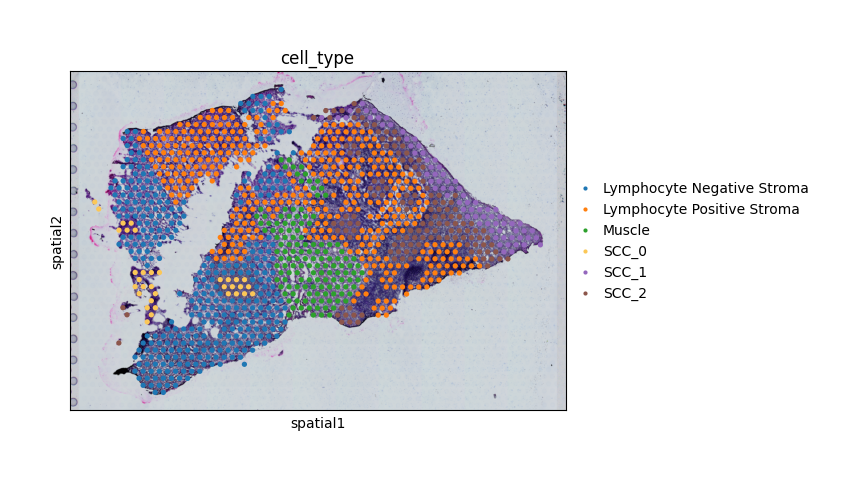

In [9]:
# Plot Sub-clustering
adata_h5ad.uns[f'{args.label_col_name}_colors'] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#FBC757', '#9467bd', '#8c564b']
sc.pl.spatial(adata_h5ad, color=args.label_col_name)

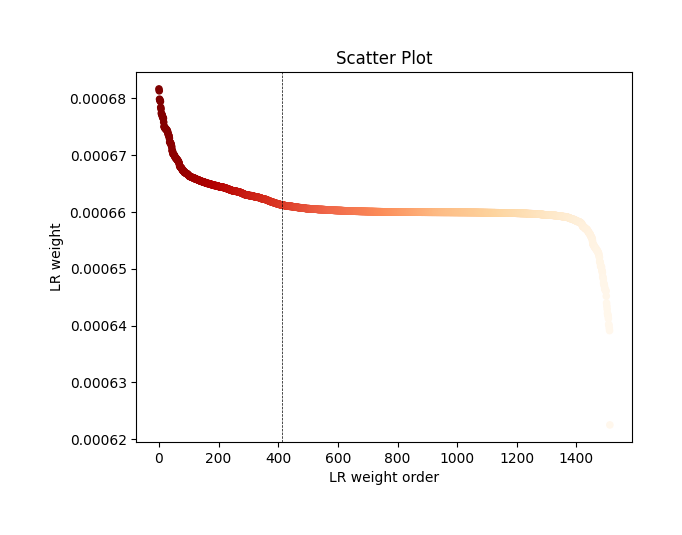

>>> Found inflection point: 411


In [10]:
# Plot LRP weight
result_path = osp.join(
    args.result_path, args.data_name, args.time_stamp, method
)
df = pd.read_csv(osp.join(result_path, f'lr_weight.csv'))
print(f">>> Found inflection point: {STCase.tl.Inflection_point_finding(df, vis=True)}")